In [1]:
import andi
import numpy as np
from tensorflow.keras.models import load_model
import os
AD = andi.andi_datasets()

In [2]:
i = 425
N = 10000
X1, Y1, X2, Y2, X3, Y3 = AD.andi_dataset(N = N, tasks = 1, dimensions = 2,
                                             min_T = i, max_T = i+1, load_dataset=False, path_datasets=str(i)+'master2')

Creating a dataset for task(s) 1 and dimension(s) 2.
Generating dataset for dimension 2.


/opt/anaconda3/lib/python3.7/site-packages/fbm/fbm.py:172: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  "Combination of increments n and Hurst value H "
/opt/anaconda3/lib/python3.7/site-packages/andi/diffusion_models.py:189: RuntimeWarning: overflow encountered in power
  dt = (1-np.random.rand(T))**(-1/sigma)


In [3]:
thr=0
r = np.array(X1[1]).reshape(N,2,i)       # separate into 2 Dimensions
r = np.diff(r,axis=2)                    # take the differentials
x = r[:,0,:]                             # separate x data
y = r[:,1,:]                             # separate y data



sx=np.std(x,axis=1)
x = (x-np.mean(x,axis=1).reshape(len(x),1)) / np.where(sx>thr,sx,1).reshape(len(x),1)   # normalize x data

sy=np.std(y,axis=1)
y = (y-np.mean(y,axis=1).reshape(len(y),1)) / np.where(sy>thr,sy,1).reshape(len(y),1)   # normalize y data


In [ ]:
network = load_model('Model_1D_recdout_425.h5')

predicted_x = network.predict(x.reshape(len(x),int(i/4),4))
predicted_y = network.predict(y.reshape(len(y),int(i/4),4))

predicted = ( predicted_x + predicted_y ) / 2             

In [ ]:
import matplotlib.pyplot as plt
plt.plot(predicted_x, predicted_y,'.')
plt.figure()
plt.plot(Y1[1],predicted_y, '.')

[0.17263505]


C:\Users\Aykut\Anaconda3\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '1.95')

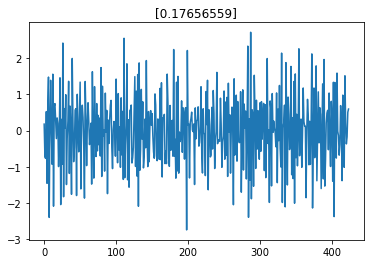

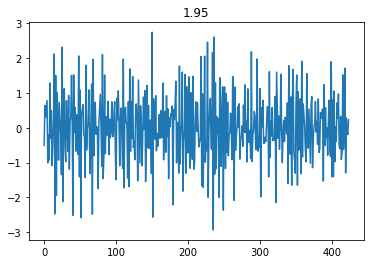

In [68]:
n = 5003
print(predicted_y[n])
plt.plot(x[n])
plt.title(predicted[n])
plt.figure()
plt.plot(y[n])
plt.title(Y1[1][n])


C:\Users\Aykut\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, 'log(MSD)')

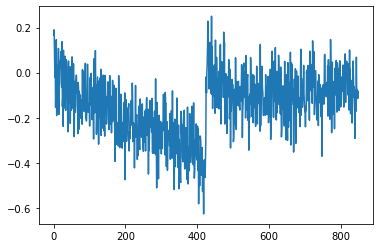

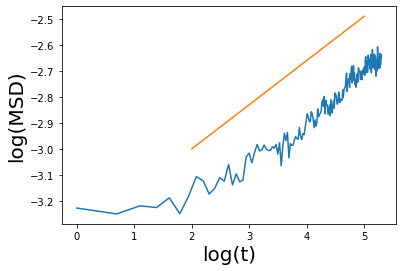

In [103]:
plt.plot(X1[1][n])
R = np.array(X1[1]).reshape(N,2,i)       # separate into 2 Dimensions
X = R[n,0,:]                             # separate x data
Y = R[n,1,:]                             # separate y data

plt.figure()
msd = np.zeros((200,))

for j in range(200):
    msd[j] = np.mean( (X-np.roll(X,-j))**2 + (Y-np.roll(Y,-j))**2   )
plt.plot(np.log(np.arange(200)), np.log(msd))
plt.plot(np.array([0, 3]) + 2,np.array([0, 3])*.17 - 3)
plt.xlabel('log(t)',fontsize=20)
plt.ylabel('log(MSD)',fontsize=20)


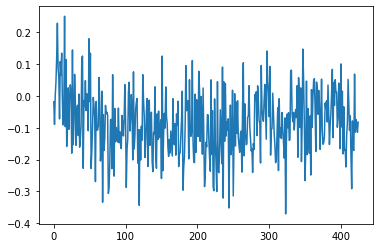

In [94]:
plt.plot(Y)

In [111]:
np.mean( np.abs(predicted.flatten() - Y1[1]))

0.30887898965716365

(10000,)